In [1]:
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd

data = pd.read_csv('data/grades_clean.csv')

In [2]:
print(data[:5])

   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  ...  f_other  f_services  f_teacher  course  home  other  \
0         0  ...        0           0          1       1     0      0   
1         0  ...        1           0          0       1     0      0   
2         3  ...        1           0          0       0     0      1   
3         0  ...        0           1          0       0     1      0   
4         0  ...        1           0          0       0     1      0   

   reputation  father  mother  other.1  
0           0       0       1        0  
1           0   

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   famsize     395 non-null    int64
 4   Pstatus     395 non-null    int64
 5   Medu        395 non-null    int64
 6   Fedu        395 non-null    int64
 7   traveltime  395 non-null    int64
 8   studytime   395 non-null    int64
 9   failures    395 non-null    int64
 10  schoolsup   395 non-null    int64
 11  famsup      395 non-null    int64
 12  paid        395 non-null    int64
 13  activities  395 non-null    int64
 14  nursery     395 non-null    int64
 15  higher      395 non-null    int64
 16  internet    395 non-null    int64
 17  romantic    395 non-null    int64
 18  famrel      395 non-null    int64
 19  freetime    395 non-null    int64
 20  goout       395 non-null    int6

In [7]:
features = data.drop('G3', axis=1)
print(features[:2])
print(features.shape)

   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   

   failures  ...  f_other  f_services  f_teacher  course  home  other  \
0         0  ...        0           0          1       1     0      0   
1         0  ...        1           0          0       1     0      0   

   reputation  father  mother  other.1  
0           0       0       1        0  
1           0       1       0        0  

[2 rows x 42 columns]
(395, 42)


In [8]:
labels = data['G3']
print(labels[:2])
print(labels.shape)

0    6
1    6
Name: G3, dtype: int64
(395,)


<Axes: >

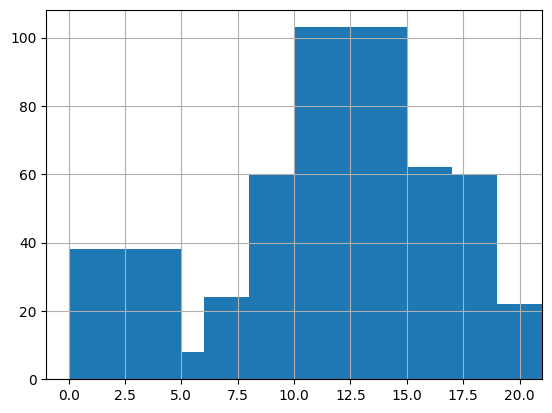

In [11]:
import matplotlib.pyplot as plt
labels.hist(width=5)

In [12]:
import sklearn.model_selection as ms

train_features, test_features, train_labels, test_labels = ms.train_test_split(features, labels, test_size=0.2)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

(316, 42)
(79, 42)
(316,)
(79,)


Training the model

In [13]:
import sklearn.linear_model as lm

regr = lm.LinearRegression()

regr = regr.fit(train_features, train_labels)

Evaluating the model

In [14]:
from sklearn.metrics import mean_squared_error as mse

train_predictions = regr.predict(train_features)

print("TRAIN Root Mean Squared Error: %.2f" % 
      (mse(train_labels, train_predictions)**0.5))

TRAIN Root Mean Squared Error: 3.96


In [15]:
test_predictions = regr.predict(test_features)

print("TEST Root Mean Squared Error: %.2f"
      % (mse(test_labels, test_predictions)**0.5))

TEST Root Mean Squared Error: 3.95
